### 데이터를 시계열로 정리하고 그래프 그리기

- 이번에는 데이터를 시계열로 정리하고 그래프를 그려봅시다.
- 간단하고 쉽게.. 할수 있도록 노력해볼게요

In [2]:
import numpy as np
import pandas as pd

In [3]:
product = pd.read_csv('./data/product.csv')
customer = pd.read_csv('./data/customer.csv')
reciepts = pd.read_csv('./data/201904 sales reciepts.csv')
staff = pd.read_csv('./data/staff.csv')

In [4]:
# 우리의 영수증 데이터는 말썽꾸러기죠.. 정리를 해둡시다
# 코드는 저번에 했던걸 그대로 사용한거에요
recieptsSortTime = reciepts.sort_values(by=['transaction_date','transaction_time'], axis=0)
recieptsSortTime.reset_index(drop=True)
temp=recieptsSortTime.reset_index(drop=False)
temp2 = temp.reset_index(drop=False).drop(['index', 'transaction_id'], axis=1) 
temp3 = temp2.rename(columns={'level_0' : 'transaction_id'})
temp3['transaction_id'] = temp3['transaction_id'] + 1
recieptsIndex = temp3

In [5]:
recieptsIndex

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,1,2019-04-01,07:01:20,5,12,5658,Y,1,1,22,2,4.0,2.0,N
1,2,2019-04-01,07:02:34,5,12,5163,Y,1,1,30,2,6.0,3.0,N
2,3,2019-04-01,07:02:56,5,30,5197,N,1,1,22,1,2.0,2.0,N
3,4,2019-04-01,07:03:30,5,12,5247,Y,1,1,22,2,4.0,2.0,N
4,5,2019-04-01,07:04:24,5,30,5333,N,1,1,37,1,3.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,49890,2019-04-29,19:57:00,8,15,8440,N,1,1,22,1,2.0,2.0,N
49890,49891,2019-04-29,19:57:00,8,15,8440,N,1,5,77,1,3.0,3.0,N
49891,49892,2019-04-29,19:57:52,3,14,0,Y,1,1,52,2,5.0,2.5,N
49892,49893,2019-04-29,19:57:55,3,14,0,Y,1,1,51,2,6.0,3.0,N


In [6]:
# 저장해서 다음에는 정리하지 않도록 하죠
recieptsIndex.to_csv('./data/receiptsIndex.csv', mode='w', index=False)

In [7]:
recieptsFile = pd.read_csv('./data/receiptsIndex.csv')

In [8]:
recieptsFile

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,1,2019-04-01,07:01:20,5,12,5658,Y,1,1,22,2,4.0,2.0,N
1,2,2019-04-01,07:02:34,5,12,5163,Y,1,1,30,2,6.0,3.0,N
2,3,2019-04-01,07:02:56,5,30,5197,N,1,1,22,1,2.0,2.0,N
3,4,2019-04-01,07:03:30,5,12,5247,Y,1,1,22,2,4.0,2.0,N
4,5,2019-04-01,07:04:24,5,30,5333,N,1,1,37,1,3.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,49890,2019-04-29,19:57:00,8,15,8440,N,1,1,22,1,2.0,2.0,N
49890,49891,2019-04-29,19:57:00,8,15,8440,N,1,5,77,1,3.0,3.0,N
49891,49892,2019-04-29,19:57:52,3,14,0,Y,1,1,52,2,5.0,2.5,N
49892,49893,2019-04-29,19:57:55,3,14,0,Y,1,1,51,2,6.0,3.0,N


In [9]:
#날짜별로 나누어 봅시다.
# df.set_index('Date_Time').groupby(pd.Grouper(freq='D')).mean()
recieptsFile

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,1,2019-04-01,07:01:20,5,12,5658,Y,1,1,22,2,4.0,2.0,N
1,2,2019-04-01,07:02:34,5,12,5163,Y,1,1,30,2,6.0,3.0,N
2,3,2019-04-01,07:02:56,5,30,5197,N,1,1,22,1,2.0,2.0,N
3,4,2019-04-01,07:03:30,5,12,5247,Y,1,1,22,2,4.0,2.0,N
4,5,2019-04-01,07:04:24,5,30,5333,N,1,1,37,1,3.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,49890,2019-04-29,19:57:00,8,15,8440,N,1,1,22,1,2.0,2.0,N
49890,49891,2019-04-29,19:57:00,8,15,8440,N,1,5,77,1,3.0,3.0,N
49891,49892,2019-04-29,19:57:52,3,14,0,Y,1,1,52,2,5.0,2.5,N
49892,49893,2019-04-29,19:57:55,3,14,0,Y,1,1,51,2,6.0,3.0,N


In [10]:
recieptsFile['revenue'] = recieptsFile['unit_price'] * recieptsFile['quantity']

In [13]:
sum = recieptsFile['revenue'].groupby(recieptsFile['transaction_date']).sum()

In [42]:
sum

transaction_date
2019-04-01    7462.00
2019-04-02    7269.10
2019-04-03    7461.25
2019-04-04    7086.45
2019-04-05    7236.25
2019-04-06    6513.75
2019-04-07    7732.23
2019-04-08    8862.29
2019-04-09    8379.73
2019-04-10    8248.98
2019-04-11    7813.99
2019-04-12    7712.53
2019-04-13    8736.51
2019-04-14    8210.86
2019-04-15    8674.39
2019-04-16    8596.54
2019-04-17    9843.05
2019-04-18    8703.53
2019-04-19    8946.89
2019-04-20    8188.26
2019-04-21    8403.01
2019-04-22    8251.91
2019-04-23    8254.89
2019-04-24    8889.30
2019-04-25    8340.85
2019-04-26    8430.88
2019-04-27    8771.58
2019-04-28    6748.15
2019-04-29    6442.40
Name: revenue, dtype: float64

In [31]:
sum[0]

7461.999999999995

In [15]:
from matplotlib import pyplot as plt

In [43]:
sum.keys()

Index(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
       '2019-04-06', '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10',
       '2019-04-11', '2019-04-12', '2019-04-13', '2019-04-14', '2019-04-15',
       '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
       '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
       '2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29'],
      dtype='object', name='transaction_date')

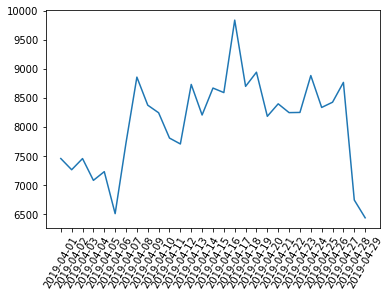

In [54]:
# plt.xticks(rotation=60)
plt.plot(sum.keys(), sum)